In [31]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt 
import numpy as np
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure
from math import pi,fabs

with MPRester("anJWfQsT0ZKuEBip") as m:
    # Structure for material id
    struct = m.get_structure_by_material_id("mp-961661")
    phonons = m.get_phonon_bandstructure_by_material_id("mp-961661")

Structure de bande de phonons :


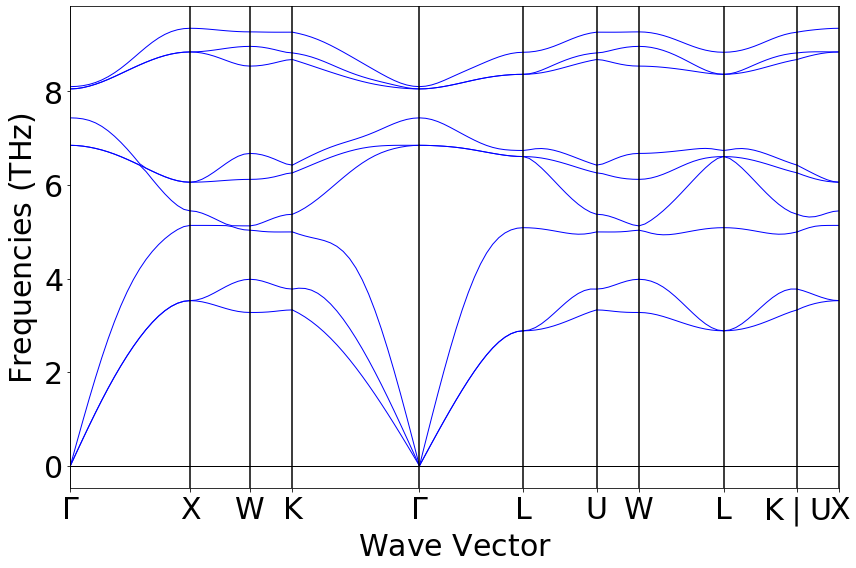

Zone de Brillouin :


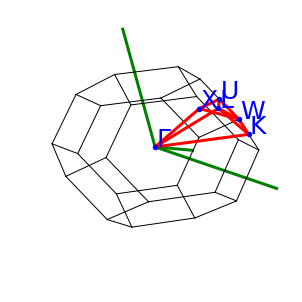

In [32]:
# Structure de bande de phonons
print("Structure de bande de phonons :")
bsplotter = PhononBSPlotter(phonons)
bsplotter.show()


# Zone de Brillouin
print("Zone de Brillouin :")
bsplotter.plot_brillouin()

# Vitesse du son

In [37]:
data = bsplotter.bs_plot_data()
distances   = data.get("distances")
frequ = data.get("frequency")
directions  = data.get('ticks').get('label')

In [38]:
# 3 distances
q1 = distances[0]
q2 = distances[3]
q3 = distances[4]

# fréquences de ces distances
freq1 = frequ[0][0]
freq2 = frequ[3][1]
freq3 = frequ[4][2]
    
# Pente pour la premiere branche
x1 = np.array([q1[0],q1[1]])
y1 = np.array([freq1[0],freq1[1]])
coef1 = np.polyfit(x1,y1,1)
a1 = np.linspace(q1[0],q1[-1],1000)
d1 =coef1[0]*a1+coef1[1]

# Pente pour la deuxieme branche
x2 = np.array([q2[-1],q2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
coef2 = np.polyfit(x2,y2,1)
a2 = np.linspace(q2[0],q2[-1],1000)
d2 =coef2[0]*a2+coef2[1]

# Pente pour la troisieme branche
x3 = np.array([q3[0],q3[1]])
y3 = np.array([freq3[0],freq3[1]])
coef3 = np.polyfit(x3,y3,1)
a3 = np.linspace(q3[0],q3[-1],1000)
d3 =coef3[0]*a3+coef3[1]

#facteur correctif (Angstrom en m et THz en Hz)
fact = 100
print("La vitesse du son de la branche acoustique", branche[0]+1, "selon la direction \u0393 - X est de ", 2*pi*fabs(coef1[0])*fact, " [m/s].")
print("La vitesse du son de la branche acoustique", branche[1]+1, "selon la direction K - \u0393 est de ", 2*pi*fabs(coef2[0])*fact, "[m/s].")
print("La vitesse du son de la branche acoustique", branche[2]+1, "selon la direction \u0393 - L est de ", 2*pi*fabs(coef3[0])*fact, "[m/s].")


La vitesse du son de la branche acoustique 1 selon la direction Γ - X est de  3334.6226696390027  [m/s].
La vitesse du son de la branche acoustique 2 selon la direction K - Γ est de  3394.359954683475 [m/s].
La vitesse du son de la branche acoustique 3 selon la direction Γ - L est de  6134.454016589755 [m/s].


La vitesse du son de la branche acoustique 1 selon la direction Γ - X est de  3334.6226696390027  [m/s].

La vitesse du son de la branche acoustique 2 selon la direction K - Γ est de  3394.359954683475 [m/s].

La vitesse du son de la branche acoustique 3 selon la direction Γ - L est de  6134.454016589755 [m/s].

# Représentation

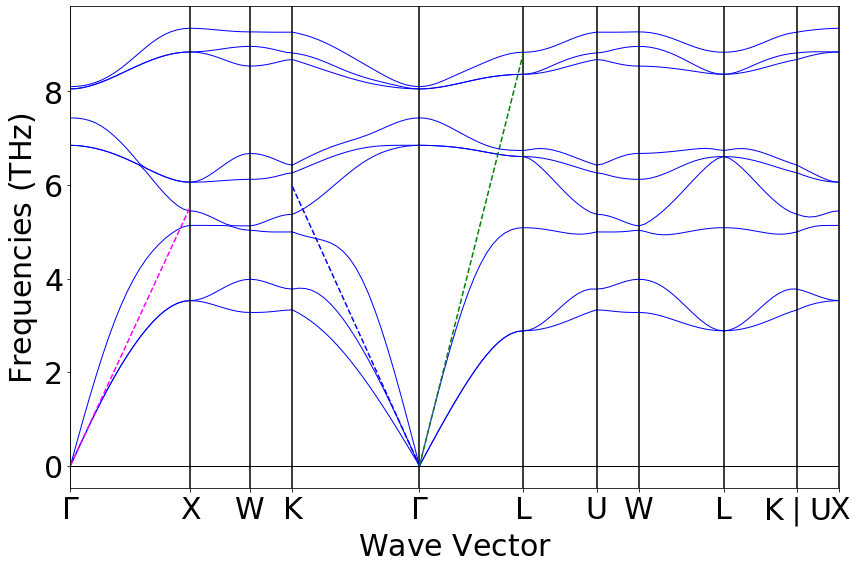

In [39]:
# Graphique
bsplotter.get_plot()
plt.plot(a1,d1,color='magenta',ls='--')
plt.plot(a2,d2,color='b',ls='--')
plt.plot(a3,d3,color='g',ls='--')
plt.show()